In [1]:
import pickle
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)})
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm
import math
from scipy.stats import f
#%pip install numpy_indexed
import datetime
from sklearn.model_selection import train_test_split
from scipy.stats import gaussian_kde

In [2]:
km = pd.read_pickle(r'kmeans.pkl')

In [10]:
#df = pd.read_csv("High/Low Training and Validation/DataSets/decdatawithweather.csv")
# df = pd.read_csv("../CleansedDataSets/JuneCleansedWWeather.csv")
df = pd.read_csv("../Running/Not Running Classification/JuneJulyClassified.csv")
df['timestamp']

0         2022-06-29 11:20:18.799
1         2022-06-29 11:20:43.800
2         2022-06-29 11:20:48.800
3         2022-06-29 11:21:03.801
4         2022-06-29 11:21:08.801
                   ...           
116374    2022-06-29 09:48:22.896
116375    2022-06-29 09:48:24.045
116376    2022-06-29 09:49:42.884
116377    2022-06-29 09:49:47.885
116378    2022-06-29 09:49:54.326
Name: timestamp, Length: 116379, dtype: object

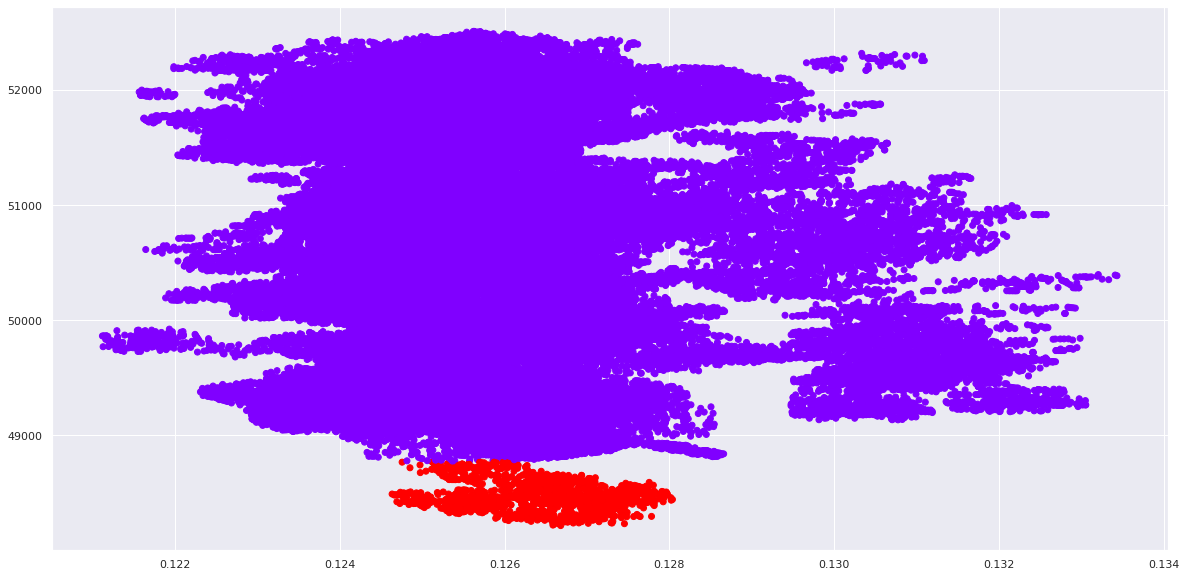

In [11]:
x = df[["Isentropic His (J/kg)"]]

identified_valclusters = km.predict(x)
val_clusters = df.copy()
val_clusters['Clusters'] = identified_valclusters
plt.scatter(val_clusters['Phi'],val_clusters['Isentropic His (J/kg)'],c=val_clusters['Clusters'],cmap='rainbow')

In [12]:

set1 = val_clusters.loc[val_clusters["Clusters"]==0]
set2 = val_clusters.loc[val_clusters["Clusters"]==1]

if(set1["Isentropic His (J/kg)"].mean() > set2["Isentropic His (J/kg)"].mean()):
    high_pressure = set1.copy()
    low_pressure = set2.copy()
else:
    low_pressure = set1.copy()
    high_pressure = set2.copy()
    
high_pressure.to_csv("DataSets/highpressureSummer.csv")
low_pressure.to_csv("DataSets/lowpressureSummer.csv")